In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import io
import ipywidgets as widgets
import matplotlib.pyplot as plt
import PIL.Image
import numpy as np
import urllib
from skimage.transform import resize
from matplotlib.image import imread
import os
from IPython.display import display
from skimage import io as io_url
import cv2
import numpy as np
from PIL import Image

In [ ]:
# Create image widgets
image3_spatial = widgets.Image(format='png', width=500, height=500, description='Spatial')
image3_freq    = widgets.Image(format='png', width=500, height=500, description='Frequency')
sidebyside     = widgets.HBox([image3_spatial, image3_freq])

# Create slider/select widgets
slider_inner   = widgets.FloatSlider(value=0,      min=0, max=1,      step=0.01, description='Inner radius')
slider_outer   = widgets.FloatSlider(value=1.44/2, min=0, max=1.44/2, step=0.01, description='Outer radius')

buf            = io.BytesIO()

orig_img = io_url.imread('https://img2.zergnet.com/2309662_300.jpg')
orig_img = np.mean(orig_img, -1)

x = np.fft.fftfreq(orig_img.shape[0]);
y = np.fft.fftfreq(orig_img.shape[1]);

xv, yv = np.meshgrid(x, y)
xv = np.fft.fftshift(xv)
yv = np.fft.fftshift(yv)

def filter_frequency(orig_img, mask):
  """
  You need to remove frequency based on the given mask.
  Params:
    orig_img: numpy image
    mask: same shape with orig_img indicating which frequency hold or remove
  Output:
    f_img: frequency image after applying mask
    img: image after applying mask
  """
  # You need to implement this function
  # Apply Fourier transform
  f = np.fft.fft2(orig_img)
  fshift = np.fft.fftshift(f)

    # Apply the mask to the frequency domain image
  fshift_masked = fshift * mask

    # Create frequency image after applying mask
  f_img = np.abs(fshift_masked)

    # Inverse Fourier transform
  img_back = np.fft.ifftshift(fshift_masked)
  img_back = np.fft.ifft2(img_back)

    # Create image after applying mask
  img = np.abs(img_back)

  return f_img, img

def on_value_change3(change):
    mask = (np.sqrt(xv**2 + yv**2) < slider_outer.value) & \
           (np.sqrt(xv**2 + yv**2) >= slider_inner.value)
    mask = np.float32(mask)

    fimg, img = filter_frequency(orig_img, mask)
    buf.seek(0)
    tmp = PIL.Image.fromarray(255*img/(img.max()+0.0001))
    tmp = tmp.convert('L')
    tmp.save(buf, 'png')
    image3_spatial.value = buf.getvalue()

    buf.seek(0)
    tmp = PIL.Image.fromarray(255*np.log(0.0001*fimg + 1))
    tmp = tmp.convert('L')
    tmp.save(buf, 'png')
    image3_freq.value = buf.getvalue()


slider_inner.observe(on_value_change3, names='value')
slider_outer.observe(on_value_change3, names='value')

on_value_change3(0)

display(sidebyside)
display(slider_inner)
display(slider_outer)

FloatSlider(value=0.0, description='Inner radius', max=1.0, step=0.01)

FloatSlider(value=0.72, description='Outer radius', max=0.72, step=0.01)

In [ ]:
from skimage import filters, img_as_float
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

def read_img(path):
    return img_as_float(imread(path))

def create_hybrid_img(img1, img2, r):
    """
    Create hybrid image
    Params:
      img1: numpy image 1
      img2: numpy image 2
      r: radius that defines the filled circle of frequency of image 1. Refer to the homework title to know more.
    """
    low_frequencies = filters.gaussian(img1, sigma=r)
    high_frequencies = img2 - filters.gaussian(img2, sigma=r)
    hybrid_img = low_frequencies + high_frequencies
    return np.clip(hybrid_img, 0, 1)


(-0.5, 363.5, 379.5, -0.5)

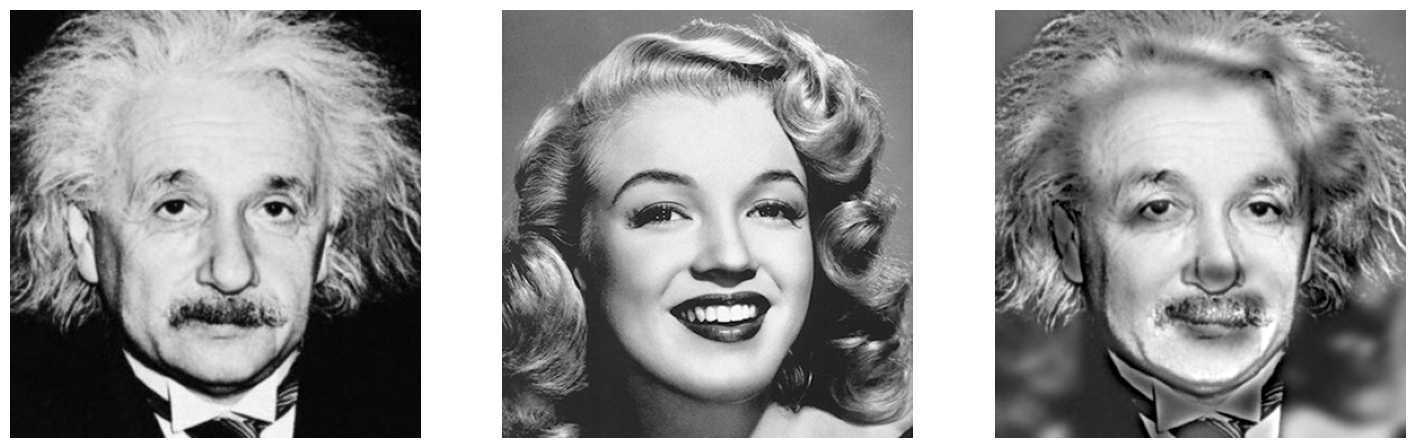

In [ ]:
image_1_path = "/content/drive/MyDrive/HW2/ex1_images/einstein.png" # <-- need to change
image_2_path = "/content/drive/MyDrive/HW2/ex1_images/marilyn.png" # <-- need to change
img_1 = read_img(image_1_path)
img_2 = read_img(image_2_path)
hybrid_img = create_hybrid_img(img_2, img_1, 5)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 15))
axes[0].imshow(img_1, cmap="gray")
axes[0].axis("off")
axes[1].imshow(img_2, cmap="gray")
axes[1].axis("off")
axes[2].imshow(hybrid_img, cmap="gray")
axes[2].axis("off")